In [440]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [441]:
df = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [442]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [443]:
#Dropping day, month and year
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

In [444]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [445]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [446]:
#Encoding Classes

df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [447]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [448]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [449]:
#Independent and Dependent Feature

X = df.drop('FWI', axis = 1)
y = df['FWI']

In [450]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [451]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [452]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

<Axes: >

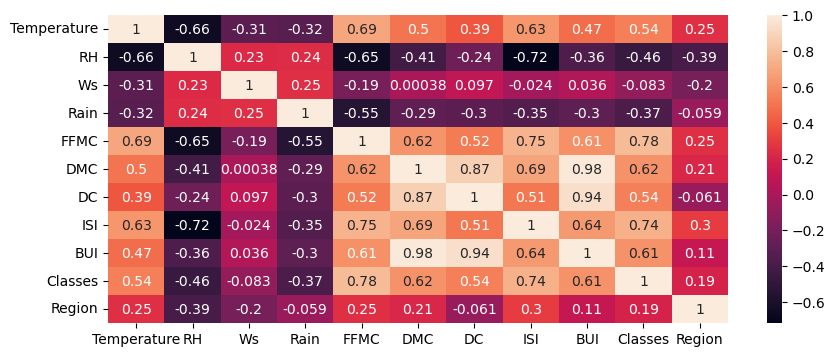

In [453]:
#Feature Selection
#Check for Multi collinearity

plt.figure(figsize = (10, 4))
sns.heatmap(X_train.corr(), annot = True)

In [454]:
#Setting a threshold value and getting the columns which has a greater threshold value to drop it

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

 

                

In [455]:
corr_features = correlation(X_train, 0.85)


In [456]:
#Drop these highly correlated features (0.85)

X_train.drop(corr_features, axis = 1, inplace = True)
X_test.drop(corr_features, axis = 1, inplace = True)

### Feature Scaling or Standardization

In [457]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [458]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

Text(0.5, 1.0, 'X Train after scaling')

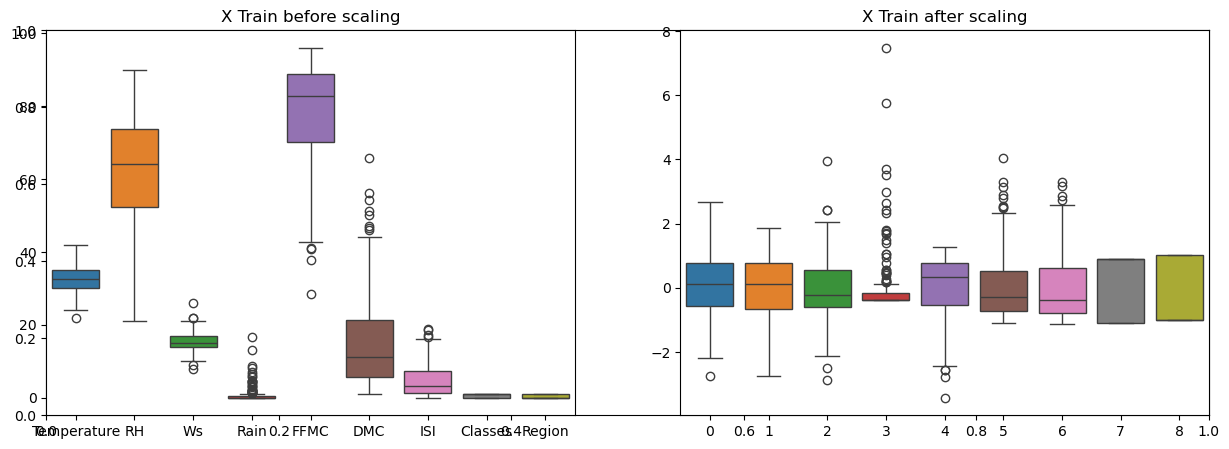

In [459]:
plt.subplots(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data = X_train)
plt.title("X Train before scaling")

plt.subplot(1, 2, 2)
sns.boxplot(data = X_train_scaled)
plt.title("X Train after scaling")

## Linear Regression Model

In [460]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)
y_pred = linear_regression.predict(X_test_scaled)


In [461]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("R2 Score: ", score)

Mean Absolute Error:  0.546823646524999
R2 Score:  0.9847657384266951


### Checking with scatter plot. If the plot is linear then we have a good model.

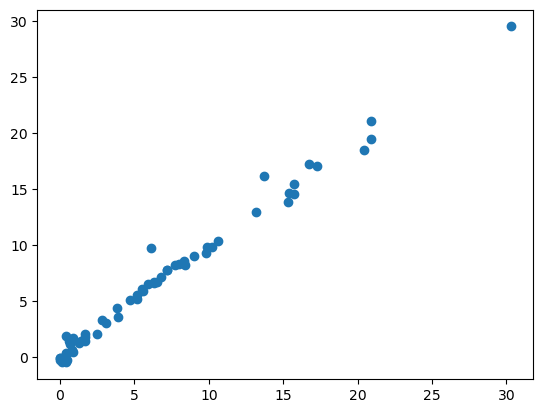

In [462]:
plt.scatter(y_test, y_pred)

### Lasso Regression

In [463]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

In [464]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("R2 Score: ", score)

Mean Absolute Error:  1.1331759949144082
R2 Score:  0.9492020263112388


### Cross Validation Lasso

Mean Absolute Error:  1.1331759949144082
R2 Score:  0.9492020263112388


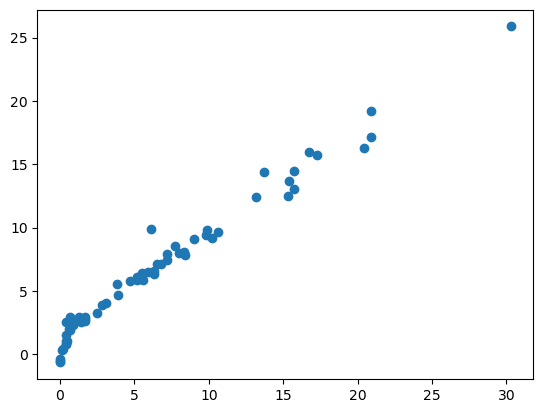

In [465]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled, y_train)
lassocv.predict(X_test_scaled)

plt.scatter(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("R2 Score: ", score)

In [466]:
lassocv.alpha_

0.05725391318234408

In [467]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

### Ridge Regression 

In [468]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

In [469]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("R2 Score: ", score)

Mean Absolute Error:  0.5642305340105711
R2 Score:  0.9842993364555512


### Ridge Cross Validation

Mean Absolute Error:  0.5642305340105711
R2 Score:  0.9842993364555512


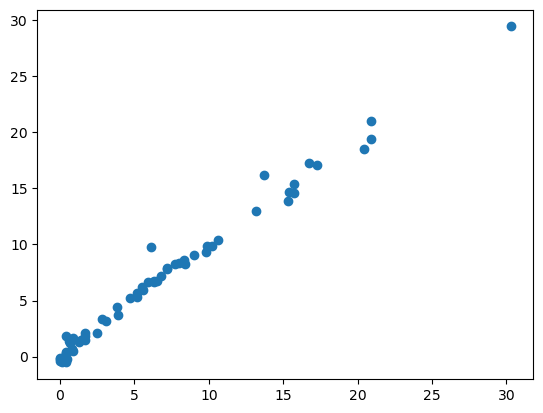

In [470]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled, y_train)
ridgecv.predict(X_test_scaled)

plt.scatter(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("R2 Score: ", score)

In [471]:
ridgecv.alpha_

1.0

In [472]:
ridgecv.alphas

(0.1, 1.0, 10.0)

## ElasticNet Regression

In [473]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)

In [474]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("R2 Score: ", score)

Mean Absolute Error:  1.8822353634896
R2 Score:  0.8753460589519703


### ElasticNet Cross Validation

Mean Absolute Error:  1.8822353634896
R2 Score:  0.8753460589519703


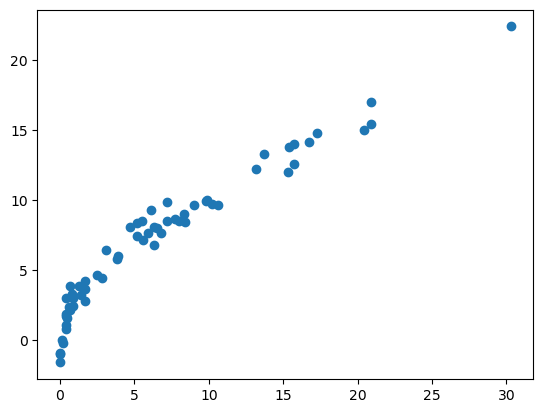

In [475]:
from sklearn.linear_model import ElasticNetCV

elasticcv = ElasticNetCV(cv = 5)
elasticcv.fit(X_train_scaled, y_train)
elasticcv.predict(X_test_scaled)

plt.scatter(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("R2 Score: ", score)

In [476]:
elasticcv.alpha_

0.04311146156383891

In [477]:
elasticcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11